# SVC - Decision Function Analysis

Below is code written to analyse the decision function created by the classical SVC component of the QSVC

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Imports

In [20]:
# imports
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import os

# import data class
from utilities.dataset_utils import DiabetesData

from qiskit_machine_learning.algorithms import QSVC

# explainability imports
# parallel coordinates plot
from pandas.plotting import parallel_coordinates

# qiskit imports
# simulator
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import SamplerV2 as Sampler

In [2]:
np.random.seed(42)  # reproducibility

Dataset loading - change code hear to analyze different dataset

**N.B.** works only for binary classification datasets

In [3]:
# path to diabetes.csv
path = os.path.join(os.getcwd(), '..', '..', '..', 'utilities', 'diabetes.csv')
# load dataset class
dataset = DiabetesData(path)

In [4]:
# path to diabetes.csv
path = os.path.join(os.getcwd(), '..', '..', '..', 'models', 'qml-simulator', 'qsvc_best_params.model')

qsvc = QSVC.load(path)

In [5]:
# list of feature names
feature_names = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age"
]

In [6]:
# get data
X_train, X_test, y_train, y_test = dataset.preprocess_data_ranged()

In [7]:
# setup backend simulator
backend = AerSimulator()
backend.set_options(max_parallel_threads=os.cpu_count(), method='statevector')

In [8]:
# sampler
sampler = Sampler.from_backend(backend)

In [9]:
samples = len(X_test)
decisions = []
batch_size = 10

for start in range(0, samples, batch_size):
    end = min(start + batch_size, samples)
    
    remaining_samples = samples - end
    progress = (end / samples) * 100
    
    batch = X_test[start:end]
    
    decisions.append(qsvc.decision_function(batch))
    
    print(f"Processed {end}/{samples} samples ({progress:.2f}%). Remaining: {remaining_samples}")
    
decisions = np.concatenate(decisions)

Processed 10/231 samples (4.33%). Remaining: 221
Processed 20/231 samples (8.66%). Remaining: 211
Processed 30/231 samples (12.99%). Remaining: 201
Processed 40/231 samples (17.32%). Remaining: 191
Processed 50/231 samples (21.65%). Remaining: 181
Processed 60/231 samples (25.97%). Remaining: 171
Processed 70/231 samples (30.30%). Remaining: 161
Processed 80/231 samples (34.63%). Remaining: 151
Processed 90/231 samples (38.96%). Remaining: 141
Processed 100/231 samples (43.29%). Remaining: 131
Processed 110/231 samples (47.62%). Remaining: 121
Processed 120/231 samples (51.95%). Remaining: 111
Processed 130/231 samples (56.28%). Remaining: 101
Processed 140/231 samples (60.61%). Remaining: 91
Processed 150/231 samples (64.94%). Remaining: 81
Processed 160/231 samples (69.26%). Remaining: 71
Processed 170/231 samples (73.59%). Remaining: 61
Processed 180/231 samples (77.92%). Remaining: 51
Processed 190/231 samples (82.25%). Remaining: 41
Processed 200/231 samples (86.58%). Remaining: 3

In [ ]:
df = pd.DataFrame(X_test, columns=feature_names)
df['decision'] = decisions
df['target'] = y_test

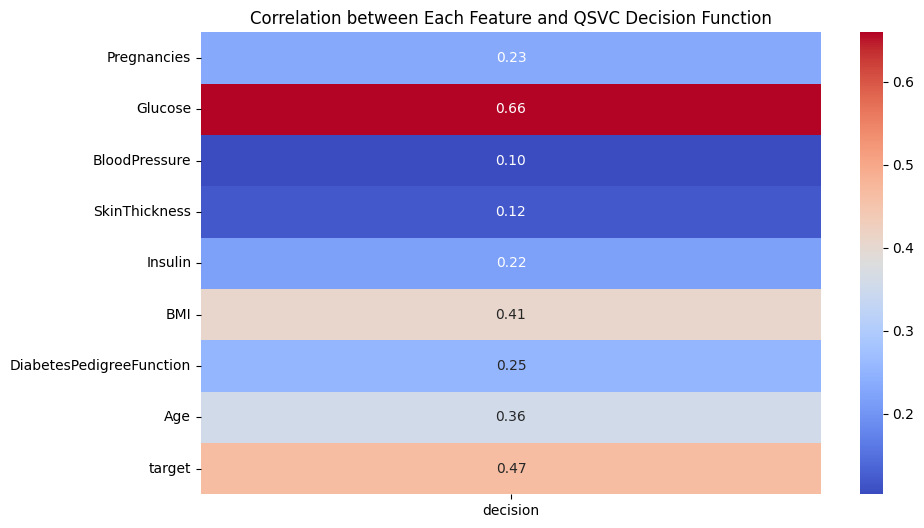

In [23]:
corr = df.corr()

plt.figure(figsize=(10, 6))
# Display only correlation values of features with the decision function
sns.heatmap(corr[['decision']].drop('decision'), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Each Feature and QSVC Decision Function")
plt.show()